# K-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score as db
from sklearn.metrics import calinski_harabasz_score as ch
%matplotlib inline

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [2]:
n1 = 150  # Number of samples
N1 = 4    # Number of features
i1 = load_iris().data.T
# Normalization
for i in range(N1):
    i1[i] = i1[i]/np.max(i1[i])
i1 = i1.T
ie = pd.read_csv('data/iris_embbeding.csv').values
i2 = pd.read_csv('data/high_dimension_iris.csv').values

In [3]:
n2 = 284807  # Number of samples
N2 = 29    # Number of features
c1 = pd.read_csv('data/creditcard.csv')
c1 = c1.drop('Time', axis=1)
c1 = c1.drop('Class', axis = 1)
c1 = c1.values.T
# Normalization
for i in range(N2):
    c1[i] = c1[i]/np.max(c1[i])
c1 = c1.T
ce = pd.read_csv('data/credit_embbeding.csv').values
c2 = pd.read_csv('data/credit_pca.csv').values

### Parameters

In [5]:
# Data
X = c2
Y = ce
N = 8
n = n2

In [49]:
k = 5
epsilon = 0.005
metric = 'euclidean'

In [50]:
def cost_function(clusters, data, metric):
    A = data.reshape((*data.shape,1))
    B = clusters.reshape((1,*clusters.shape))
    J = cdist(clusters, data, metric=metric) 
    J = np.sum(np.min(J, axis=-1))
    return J

In [51]:
# Compute the matrix U
def compute_U(clusters, data, metric):
    U = cdist(clusters, data, metric=metric).T 
    U = np.argmin(U, axis=-1)    
    return U

In [52]:
def update_cluster(U, data, k):
    c = np.arange(k).reshape(k,1)
    mask = U == c
    mask = np.expand_dims(mask, axis=-1)
    A = np.expand_dims(data, axis=0)
    mask = np.where(mask, A, np.nan)
    new_cluster = np.nanmean(mask, axis=1)
    return new_cluster

In [53]:
# Initialize the centers
c_random = np.random.randint(0,n,k)
clusters = X[c_random]
cluster_index = c_random

In [54]:
# Principal cycle
Jdiff = np.inf
Jprev = np.inf
while (Jdiff > epsilon):
    # computar la matrix U
    U = compute_U(clusters, X, metric)
    # computar el costo
    J = cost_function(clusters, X, metric)
    # actualizar los clusters
    clusters = update_cluster(U, X, k)
    Jdiff = np.abs(J-Jprev)
    Jprev = J

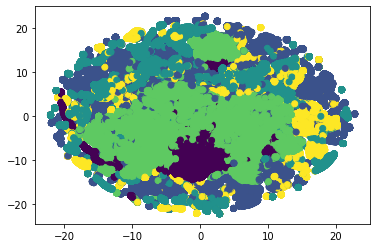

In [55]:
plt.scatter(Y[:,0], Y[:,1], c=U, cmap = 'viridis')
plt.show()